In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("2-multiplegradesdataset.csv")

In [3]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


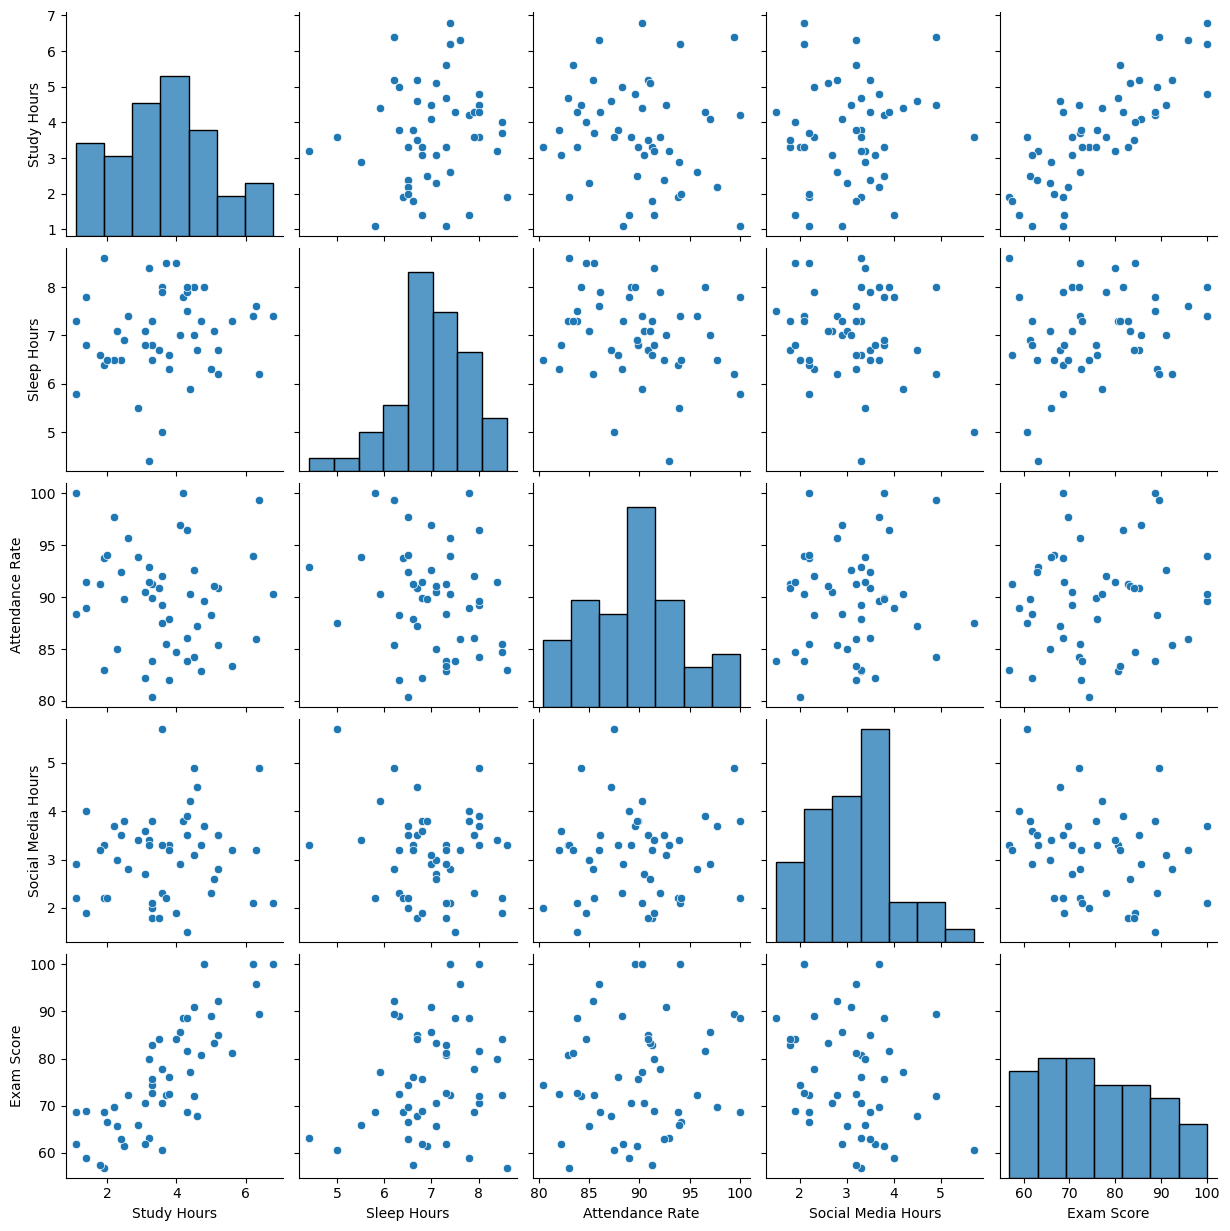

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


<Axes: >

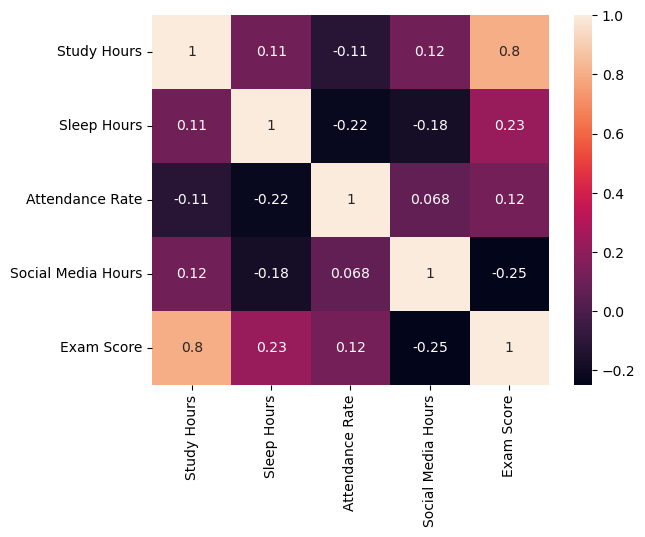

In [6]:
sns.heatmap(df.corr(),annot=True)

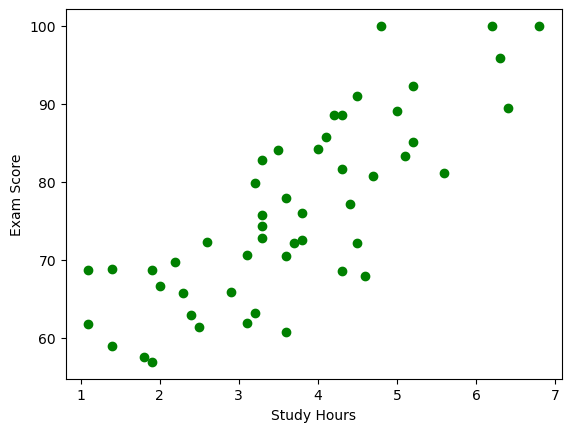

In [7]:
plt.scatter(df["Study Hours"],df["Exam Score"],color="g")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()    #yakından incelemek istersek kolerasyonları bu şekilde yapılabilir

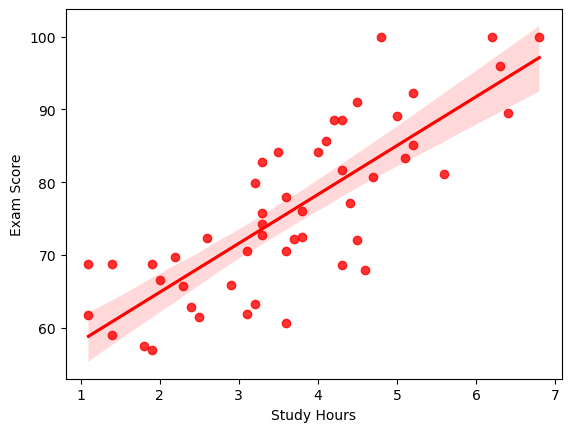

In [8]:
sns.regplot(x=df["Study Hours"], y=df["Exam Score"],scatter=True,color="r")
plt.show()   #best fit line çizilebilir.

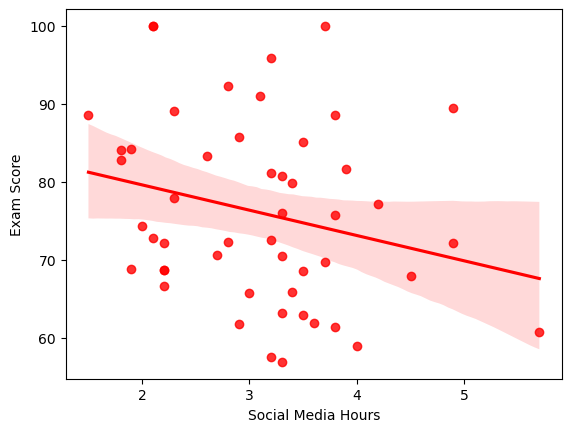

In [9]:
sns.regplot(x=df["Social Media Hours"], y=df["Exam Score"],scatter=True,color="r")
plt.show()   #best fit line çizilebilir.

In [10]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [11]:
X = df[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]
y = df["Exam Score"]

In [12]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [13]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [16]:
X_train.shape

(37, 4)

In [17]:
X_test.shape

(13, 4)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [24]:
new_student = [[5,6,70,4]]

In [25]:
new_student_scaled = scaler.transform(new_student)

C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
model.predict(new_student_scaled)

array([67.37359328])

In [27]:
#prediction

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)


mse:  14.600589378986278
mae:  3.2770264859627876
rmse:  3.821071757895457


In [64]:
score = r2_score(y_test, y_pred)

In [66]:
score

0.9156707345772709

In [74]:
model.coef_    #denklemin katsayıları

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])

In [76]:
model.intercept_

np.float64(77.41081081081082)

In [78]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5
